In [27]:
%run ./model4.ipynb

In [28]:
n = 6
n_grid = 6
a_s = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]


############# Initialize ############
theta_start = 0
theta_end = np.pi
r_start = 3
r_end = 4

n_grid = 6
thetas = torch.linspace(theta_start,theta_end,steps=n_grid, dtype=torch.double)
rs = torch.linspace(r_start,r_end,steps=n_grid, dtype=torch.double)
f_free = torch.zeros((n_grid,5*n_grid-2), dtype=torch.double)
f_free[:,:n_grid] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:])
f_free[:,n_grid:2*n_grid] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:])
f_free[:,2*n_grid:3*n_grid-2] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,1:-1])
f_free[:,3*n_grid-2:4*n_grid-2] = 0.001*(rs[:,np.newaxis] + thetas[np.newaxis,:])
f_free[:,4*n_grid-2:5*n_grid-2] = 0.001*torch.ones((n_grid,n_grid), dtype=torch.double)
f_free = f_free.reshape(-1,)
f_free = torch.nn.Parameter(f_free, requires_grad=True)

#interp_mode = "bicubic"
#align_corners = True
M = 1.0

############# Train ##############
for a in a_s:
    print("a={}".format(a))
    f_free, error, duration = train(a, n, f_free)
    f_free = torch.nn.Parameter(f_free, requires_grad=True)
    print(error)
    torch.save(f_free.clone(), "./kerr_result/f_free_a_%.3f_n_%d_fix_n_sweep_a"%(a,n))
    np.save("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n), error)
    np.save("./kerr_result/time_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n), duration)
    np.save("./kerr_result/losses_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n), error)

a=0.0
time=46.95778203010559
3.842280579897573e-06
a=0.1
time=14.918812036514282
5.482204561150558e-06
a=0.2
time=17.689453125
3.0700871530371906e-05
a=0.3
time=15.795058965682983
0.00014053962511271354
a=0.4
time=17.580574989318848
0.00043718901034971245
a=0.5
time=15.27832293510437
0.001064589969802112
a=0.6
time=17.50572896003723
0.00220915474487081
a=0.7
time=18.317718982696533
0.004100558138832902
a=0.8
time=14.740431070327759
0.0070125880504171186
a=0.9
time=16.269411087036133
0.011264066486592774
a=1.0
time=15.461892127990723
0.01721982316893347


In [29]:
f_frees = []
times = []
errors = []
for a in a_s:
    f_free = torch.load("./kerr_result/f_free_a_%.3f_n_%d_fix_n_sweep_a"%(a,n))
    duration = np.load("./kerr_result/time_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
    error = np.load("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
    np.load("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
    f_frees.append(f_free)
    times.append(duration)
    errors.append(error)

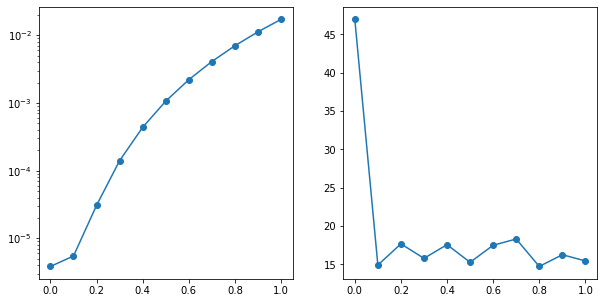

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(a_s, errors, marker="o")
plt.yscale('log')

plt.subplot(1,2,2)
plt.plot(a_s, times, marker="o")

In [11]:
f_free.reshape

torch.Size([114])